# P419 03 Хранение и сохранение данных

Автор: Шабанов Павел Александрович

Email: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: **13.10.2018**

### Цель: 

+ познакомиться с основными объектами-контейнерами для хранения данных;
+ изучить синтаксис для универсального чтения/записи данных файлов различного форматов (текстового и бинарного)

<a id='up'></a>
### План

1. [**Стандартные способы хранения данных в объектах-контейнерах**](#containers)
    + [Задание 3.1](#test_3.1)
    + [Кортежи и множества](#tuples_sets)
    + [Базовые методы объектов-контейнеров](#containers_base_methods)
    + [Задание 3.2](#test_3.2)
2. [**Сохранение данных в файл**](#save)
    + [Запись данных строками в файл](#fwrite)
    
3. [**Чтение данных из файлов**](#read)
    + [Чтение текстовых файлов](#fread)
    + [команда with](#with)
    + [Данные для анализа](#datasets)

<a id='containers'></a>
## Стандартные способы хранения данных в объектах-контейнерах

[Вверх](#up)

Условно "базовые" типы данных (строки, числа, булевы переменные) можно сохранять в переменные и выполнять с ними большое количество арифметико-логических операций.

Для более сложных задач требуются типы данных, способные собирать, упорядочивать и хранить данные других более простых с составной точки зрения типов.

Среди базовых возможностей (возможностей стандартной библиотеки языка python) стоит особо выделить два типа данных:

1. **Список (List)**;
2. **Словарь (Dictionary)**.

`Список` - это упорядоченная последовательность, поддерживающая механизм итераций (перебора хранящихся элементов внутри списка) и индексации (каждому элементу соответствует числовой индекс, состоящий из комбинации целых чисел).

> Помимо прямой индексации, в python поддерживается и обратная индексация элементов упорядоченных последовательностей (а это не только списки и кортежи, но и строки), которая начинается с -1 до -N, где N - число элементов последовательности или длина последовательности.

[!caption](, )

`Словарь` - это особый тип-контейнер, именуюемый отображением. Словарь имеет другой принцип доступа к хранящимся в нём данным: по ключам, а не по индексам. Т.е. адресом здесь служит некоторый **уникальный** для словаря ключ-объект (чаще всего это строки), а не комбинация целых чисел (индекс), как в списке.

In [ ]:
# Примеры

primes = [1, 2, 3, 4, 5, 6, 7]
ages = {'Anna' : 22, 
        'Berny' : 25, 
        'Colin' : 42, 
        'Маша' : 5.2, 
        'Миша' : 6.3,
        'Коля' : 1.6,
        'Генрих' : 45
       }
       
# Обращение по индексу к списку
print('Содержимое списка')
print(primes[0], primes[-7])
print(primes[6], primes[-1])
print(primes[-3], primes[4])
        
print('Содержимое словаря')
print(ages['Anna'], ages['Генрих'], ages['Миша'])        

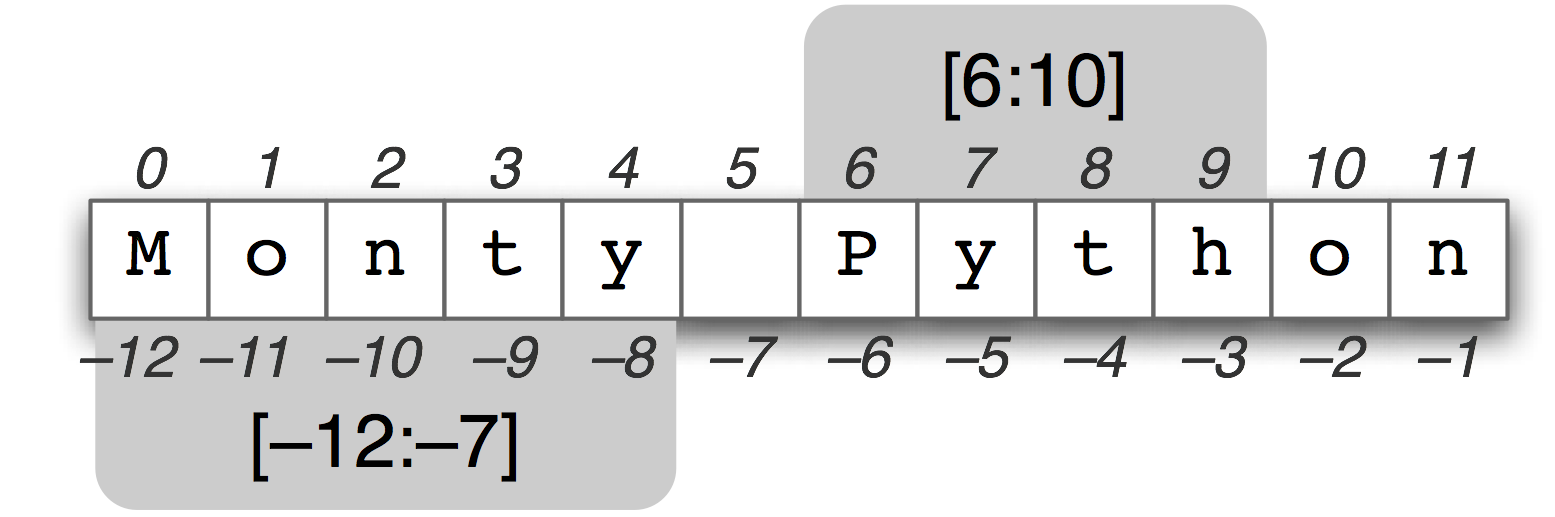

In [2]:
# Индексация последовательностей в python + срезы (slices)

from IPython.display import Image
Image(filename='./pictures/python_indexing.png') 

Хранение данных - это хорошо. Но часто требуется динамическое хранение, т.е. необходима возможность перезаписать данные, обновить данные и т.д.

Наличие адреса в списках (набор индексов) и словарях (ключи) позволяет не только обращаться к элементу (чтение данных), но и изменять значения этих самых элементов (запись данных).

Чтобы изменить имеющиеся в объекте-контейнере данные, необходимо соединить две операции в одной строке: обращение и присваивание.

In [4]:
#Примеры изменения элементов в словарях и списках

box = [23.5, 24.7, 21.0, 22.2, 29.6]
dic = {'A' : 119119, 'B' : 117997, 'C' : 117218}
print('Для списков')
print('До', box[1])

# Заменяем второй элемент (индекс второго элемента суть 1) в списке
box[1] = -99
print('После', box[1])

print('Для словарей')
print('До', dic['A'])
# Заменяем элемент с ключом А в словаре
dic['A'] = -88
print('После', dic['A'])

Для списков
До 24.7
После -99
Для словарей
До 119119
После -88


In [6]:
# НО! Строки - неизменяемые с точки зрения замены последовательности!
# Можно лишь увеличивать строки новыми элементами или брать срезы
name = 'Victoria'
print(name[-2])
name[-2] = 'y'

i


TypeError: 'str' object does not support item assignment

<a id='test_3.1'></a>
### Задание 3.1
[Вверх](#up)

Данные (возраст, имя и статус гражданства) из анкеты были записаны в переменные age, name, resident_status соответственно. Необходимо выполнить следующие задания:

1) Вывести на экран возраст анектируемого;

2) Изменить имя анкетируемого в словаре dic на 'Maria';

3) Изменить возраст анкетируемого в списке box на 19;

4) Создать новый словарь подобными переменными, но актуальными данными.

In [ ]:
# Ответы из анкеты:
age = 22 
name = 'Anna'
resident_status = True

box = [age, name, resident_status]   # список
dic = {'i_age' : age,
       'i_name' : name,
       'i_resident_status' : resident_status
      }   # словарь

<a id='tuples_sets'></a>
### Кортежи и множества
[Вверх](#up)

В языке python реализован подобный спискам тип данных, созданный специально для *хранения и защиты* данных от перезаписи. Они называются **Кортежами (tuples)**.

Кортежи являются **неизменяемыми** последовательностями. Т.е. к ним нельзя добавлять элементы, нельзя изменять элементы, хранящиеся в кортеже.



In [7]:
# Кортеж изменять нельзя! Он такой, каким появлися на свет!

box = [23.5, 24.7, 21.0, 22.2, 29.6]
egg = tuple(box)
print('До', egg[1])
# Заменяем второй элемент (индекс второго элемента суть 1) в списке
egg[1] = -99
print('После ... хотя это сообщение мы никогда не увидим, так как выше - ошибка!')

До 24.7


TypeError: 'tuple' object does not support item assignment

Есть среди базовых типов данных и ещё один специфический тип-контейнер - **множества (set)**.

Множество - это неупорядоченная последовательность, в котором могут храниться **ТОЛЬКО** уникальные элементы. Соответственно здесь нет поддержки индексации ни по индексам, ни по ключам. Основное удобство данного контейнера - он позволяет быстро получить уникальные элементы из списков/кортежей и выполнять операции с множествами как в математике: объединение, пересечение и т.д.

Множество вводится с помощью функции `set()` от других типов данных (список, например), либо с помощью фигурных скобок (см. пример ниже).

In [ ]:
# I Вариант
box = list(range(5))
A = set(box)
print(type(A), A)

# II Вариант
# Несмотря на {}, это НЕ СЛОВАРЬ! В словаре всегда пара "ключ" : "значение"
B = {1, 2, 4, 5}
print(type(B), B)

<a id='containers_base_methods'></a>
### Методы базовых объектов контейнеров

Ниже приведена таблица базовых методов для объектов-контейнеров: 
+ списка (list)
+ кортежа (tuple)
+ множества (set)
+ словаря (dict).

**Метод** - это функция, привязанная к конкретному типу данных (а точнее, классу объекта) через точку. В конце метода необходимо ставить круглые скобки (это признак того, что перед нами функция). В круглые же скобки передаются аргументы.

> `Переменная.Метод()`

#### Таблица 1 Методы базовых объектов-контейнеров

|Методы|Список|Кортеж|Множество|Словарь|
| :-------: |:-: | :-: | :-: | :-: |
| append()| да | x  | x  | x  |      
| extend()| да | x  | x  | x  |      
| insert()| да | x  | x  | x  |      
| clear() | x | x  | да | да |    
| pop()   | да | x  | да | да |   
| remove()| да | x  | да | x  |      
| count() | да | да | x  |  x |      
| index() | да | да | x  | x  |       
|reverse()| да | x  | x  | x  |      
| sort()  | да | x  | x  | x  |      
| update()| x | x  | да | да |      
| copy()  | x | x  | да | да |      


In [ ]:
N = 20
box = list(range(N))
print(box[-5:], len(box))

# Добавление элемента
box.append(-2)
print(box[-5:], len(box))

<a id='test_3.2'></a>
### Задание 3.2
[Вверх](#up)

Дан список случайных целых чисел `lst`. Необходимо:

1) Отсортировать список по возрастанию элементов;

2) убрать из списка пятый элемент;

3) добавить в конец списка элемент "0";

4) перевернуть получившийся список;

5) создать кортеж из полученного списка.

In [8]:
import random
N = 20
lst = [random.randint(-100, 100) for i in range(N)]
print(lst)

#1 Отсортировать список по возрастанию элементов;

#2 убрать из списка пятый элемент;

#3 добавить в конец списка элемент "0";

#4 перевернуть получившийся список;

#5 создать кортеж из полученного списка.

[-44, 17, -39, -25, -80, 6, 7, -97, 98, 28, 33, 27, -76, 50, -7, -18, -91, 74, 96, -97]


<a id='save'></a>
## Сохранение данных в файл
[Вверх](#up)

Работа с данными немыслима без обеспечения их хранения. Сохранить данные, хранящиеся в ОЗУ в виде списков-кортежей, массивов и др., на жёсткий диск в виде файла можно разными методами. Однородность типов данных (только числа, только сроки и т.д.) играет решающую роль в выборе того или иного способа.

<a id="write"></a>
### Запись данных строками в файл
[Вверх](#up)

Самый базовый и простой (? серьёзно ?) способ сохранить данные в файл - это записать его построчно с помощью метода **write()** для объект-файла. Объект файл создаётся с помощью ключевого слова **open()**. При создании объект-файла помимо обязательного аргумента в виде имени файла, можно указать необязательный параметр `mode` (в случае записи данных в файл это будут строки "w" или "w+").

Данные формируются в виде строк и последовательно записываются в объект-файл. Числовые данные нужно превратить в строки с каким-либо разделителем между ними (от пробела до точки с запятой). 

> Также необходимо в конце строки добавлять символ перевод строки **"\\n"** в качестве разделителя уже строк между собой. Иначе все строки будут визуально располагаться в одной строке.

Для записи данных в файл необходимо выполнить несколько шагов:

1. Создать объект-файл (как правило, файл новый или будет перезапись существующего);

2. Обратиться к объект-файлу и записать в него данные в виде строки;

3. Повтороить шаг 2 столько, сколько нужно (либо до конца файла при чтении);

4. Закрыть объект-файл.

Создать объект-файл (особый тип данных наряду с числами, строками и т.д.) можно с помощью встроенной функции **open()**.

Функция **open** принимает обязательный аргумент-строку, которая является именем существующего файла. Строка может включать путь до файла в ОС. Второй необязательный параметр - тип . Может принимать непротиворечивую комбинацию из следующих символов.

| Mode | Text                      |
| ---- |---------------------------|
| 'r'  | open for reading (default)|
| 'w'  | open for writing, truncating the file first|
| 'x'  | open for exclusive creation, failing if the file already exists|
| 'a'  | open for writing, appending to the end of the file if it exists|
| 'b'  | binary mode|
| 't'  | text mode (default)|
| '+'  | open a disk file for updating (reading and writing)|

In [9]:
# Создание и запись строки s в файл new.txt
s = 'Hello, my name is ...\n'
f = open('new.txt', 'w')
f.write(s)
f.close()

In [10]:
# Создание и запись строки s в файл new.txt
N = 17
primes = list(range(1, N))
f = open('primes.txt', 'w')
for num in primes:
    f.write(str(num) + '\n')
#    f.write(num)
f.close()

<a id='read'></a>
## Чтение данных
[Вверх](#up)

<a id='fread'></a>
### Чтение текстовых данных
[Вверх](#up)

Текстовые данные - т.е. данные, которые можно увидеть с помощью базовых текстовых редакторов (например, блокнот). Этот формат хранит данные в виде символов в некоторой системе кодировки. На данный момент самой распространённой кодировкой является **юникод**. Юникод поддерживает отображение кириллических символов, что очень удобно для русскоязычных пользователей.

Строки, т.е. набор символов, отделяются друг от друга с помощью символа окончания строки. Таким образом, текстовый файл представляет собой либо одну строку (может быть очень длинную), либо набор строк. Это важно знать для понимания чтения/записи данных с помощью базовых средств python.

Для чтения данных в файл необходимо выполнить несколько шагов:

1. Создать объект-файл (существующий файл!);

2. Обратиться к объект-файлу и прочитать данные из него;

3. Повтороить шаг 2 столько, сколько нужно (либо до конца файла при чтении);

4. Закрыть объект-файл.

Создать объект-файл (особый тип данных наряду с числами, строками и т.д.) можно с помощью встроенной функции **open()**.

Функция **open** принимает обязательный аргумент-строку, которая является именем существующего файла. Строка может включать путь до файла в ОС. Второй необязательный параметр в случае чтения данных - **r** или **r+**

Извлечь данные из открытого объект-файла можно несколькими методами объект-файла:

1. **readlines()** - считывает строки в список. Разделяющий признак - символ конца строки;

2. **readline()** - чтение одной строки с текущей позиции каректи. Вызывая итерационно данный метод, можно перебрать все строки объект-файла;

3. **read(N)** - побайтовое чтение, N - целое число;

4. итерациями (перебором в цикле) элементов от объект-файла.

In [11]:
f = open('new.txt', 'r')
s1 = f.read()
f.close()

f = open('new.txt', 'r')
s2 = f.readline()
f.close()

f = open('new.txt', 'r')
s3 = f.readlines()
f.close()

print(s1)
print(s2)
print(s3)

Hello, my name is ...

Hello, my name is ...

['Hello, my name is ...\n']


In [12]:
f = open('primes.txt', 'r')
primes = f.readlines()
f.close()

#box - это список строк. В тестовом примере одна строка, которая всё равно упакована в список
print(primes)

primes = [int(num) for num in primes]
print(primes)

['1\n', '2\n', '3\n', '4\n', '5\n', '6\n', '7\n', '8\n', '9\n', '10\n', '11\n', '12\n', '13\n', '14\n', '15\n', '16\n']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [14]:
# Шаг 1
f = open(r'./data/readme.txt', 'r')

# Шаг 2
page = f.readlines()
print(type(page))
print(len(page))

# Шаг 3
f.close()

# Шаг 4
for line in page:
    print(line)

<class 'list'>
20
This sub-directory contains daily time series of hydrologic data. 

The precipitation is processed in NWS Hydrology Laboratory. 

The Potential Evaporation is based on NOAA Evaporation Atlas 

(Farnsworth, et al., 1982). The streamflow is obtained from 

USGS National Water Information System (NWIS) (available at

http://water.usgs.gov/nwis):



Col. 1: date (yyyymmdd)

     2: mean areal precipitation (mm)

     3: climatic potential evaporation (mm)

       (based NOAA Freewater Evaporation Atlas)

     4: daily streamflow discharge (mm)

     5: daily maximum air temperature (Celsius)

     6: daily minimum air temperature (Celsius)

     

The ZIPS directory contains zipped time series data.  

These are orgainized by USGS gage numbers.  

Data for basins with gage numbers beginning with 09 and higher

are in dly09.zip.  

Data for basins with gage numbers beginning with 0x are in dly0x.zip.



In [15]:
f = open(r'./data/readme.txt', 'r')   # объект-файл

book2 = []
for line in f:
    ss = line[:3]
    book2.append(ss)

f.close()

#print(book)
print(book2)

['Thi', 'The', 'The', '(Fa', 'USG', 'htt', '\n', 'Col', '   ', '   ', '   ', '   ', '   ', '   ', '   ', 'The', 'The', 'Dat', 'are', 'Dat']


<a id='with'></a>
### Команда with
[Вверх](#up)

Одним из важных этапов при работе с объект-файлом является его закрытие с помощью метода **close**. 

В случае преждевременного закрытия объекта-файла или наоборот, при попытке открыть новый файл с незакрытым объектом-файлом, возникнет ошибка исполнения. 

Чтобы избежать таких проблем можно использовать функцию **open** в связке со встроенной функцией **with**.


In [16]:
with open(r'./data/readme.txt', 'r') as f:
    lst = []
    for line in f:
        print(line)
        lst.append(line)
print(len(lst))

This sub-directory contains daily time series of hydrologic data. 

The precipitation is processed in NWS Hydrology Laboratory. 

The Potential Evaporation is based on NOAA Evaporation Atlas 

(Farnsworth, et al., 1982). The streamflow is obtained from 

USGS National Water Information System (NWIS) (available at

http://water.usgs.gov/nwis):



Col. 1: date (yyyymmdd)

     2: mean areal precipitation (mm)

     3: climatic potential evaporation (mm)

       (based NOAA Freewater Evaporation Atlas)

     4: daily streamflow discharge (mm)

     5: daily maximum air temperature (Celsius)

     6: daily minimum air temperature (Celsius)

     

The ZIPS directory contains zipped time series data.  

These are orgainized by USGS gage numbers.  

Data for basins with gage numbers beginning with 09 and higher

are in dly09.zip.  

Data for basins with gage numbers beginning with 0x are in dly0x.zip.

20


<a id='datasets'></a>
### Данные для анализа
[Вверх](#up)

Приведённые выше примеры данных анкетирования являются очень простыми. Рассмотрим более сложные и реальные наборы данных, которые теперь мы можем прочитать с помощью Python.

Сами данные представляют собой текстовые файлы в формате **\*.csv** или **\*.ascii** , разделённые с помощью ... некоторого разделителя (точка запятой, пробел и т.д.). 

По опыту отмечу, что символ "точка с запятой" является одним из самых удобных признаком для разделения данных в строке. 

Ссылки на наборы данных:

+ [IBM Sample Data Sets for ML](https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/)

+ [NAO monthly data](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii)


In [18]:
# Примеры NAO monthly data

filePath = './data/norm.nao.monthly.b5001.current.ascii.txt'
dat = []
with open(filePath, 'r') as f:
    for line in f:
        box = []
        ss = line.split(' ')   # пробел
        for elem in ss:
            if elem:
                num = float(elem)
                box.append(num)
        dat.append(box)

print('Dat length', len(dat))
for i in range(0, len(dat), 12):
    print(dat[i])

Dat length 825
[1950.0, 1.0, 0.92]
[1951.0, 1.0, 0.08]
[1952.0, 1.0, 0.93]
[1953.0, 1.0, 0.33]
[1954.0, 1.0, 0.37]
[1955.0, 1.0, -1.84]
[1956.0, 1.0, -0.22]
[1957.0, 1.0, 1.05]
[1958.0, 1.0, -0.54]
[1959.0, 1.0, -0.87]
[1960.0, 1.0, -1.29]
[1961.0, 1.0, 0.41]
[1962.0, 1.0, 0.61]
[1963.0, 1.0, -2.12]
[1964.0, 1.0, -0.95]
[1965.0, 1.0, -0.12]
[1966.0, 1.0, -1.74]
[1967.0, 1.0, -0.89]
[1968.0, 1.0, 0.13]
[1969.0, 1.0, -0.83]
[1970.0, 1.0, -1.5]
[1971.0, 1.0, -1.13]
[1972.0, 1.0, 0.27]
[1973.0, 1.0, 0.04]
[1974.0, 1.0, 1.34]
[1975.0, 1.0, 0.58]
[1976.0, 1.0, -0.25]
[1977.0, 1.0, -1.04]
[1978.0, 1.0, 0.66]
[1979.0, 1.0, -1.38]
[1980.0, 1.0, -0.75]
[1981.0, 1.0, 0.37]
[1982.0, 1.0, -0.89]
[1983.0, 1.0, 1.59]
[1984.0, 1.0, 1.66]
[1985.0, 1.0, -1.61]
[1986.0, 1.0, 1.11]
[1987.0, 1.0, -1.15]
[1988.0, 1.0, 1.02]
[1989.0, 1.0, 1.17]
[1990.0, 1.0, 1.04]
[1991.0, 1.0, 0.86]
[1992.0, 1.0, -0.13]
[1993.0, 1.0, 1.6]
[1994.0, 1.0, 1.04]
[1995.0, 1.0, 0.93]
[1996.0, 1.0, -0.12]
[1997.0, 1.0, -0.49]
[199

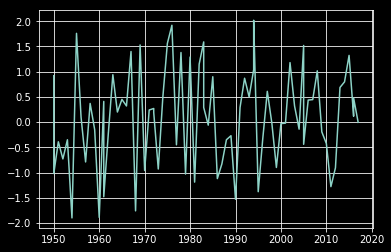

In [20]:
import matplotlib.pyplot as plt
plt.style.use('dark_background') #seaborn-pastel')

x = [s[0] for s in dat][::11]
y = [s[-1] for s in dat][::11]
plt.plot(x, y)
plt.grid()

## Практическая работа

# Задание 1

По данным абонентской базы "Telco" узнать сколько в ней мужчин (Male), а сколько женщин (Woman) в процентах.

Данные о поле абонента хранятся во втором столбце.

In [33]:
ffile = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
f = open('./data/{}'.format(ffile))

columns = f.readline()
colbox = columns.split(',')
columns2 = [s.strip() for s in colbox]

people = []
for line in f:
    sbox = line.split(',')
    ss = (sbox[1]).strip()
    people.append(ss)
f.close()

for i, s in enumerate(columns2):
    print('{}) {}'.format(i+1, s))

1) customerID
2) gender
3) SeniorCitizen
4) Partner
5) Dependents
6) tenure
7) PhoneService
8) MultipleLines
9) InternetService
10) OnlineSecurity
11) OnlineBackup
12) DeviceProtection
13) TechSupport
14) StreamingTV
15) StreamingMovies
16) Contract
17) PaperlessBilling
18) PaymentMethod
19) MonthlyCharges
20) TotalCharges
21) Churn


In [35]:
NP = len(people)
print('People number {}'.format(NP))
print(people[:5])
men = people.count('Male')
women = len(people) - men
pmen = 100.*men/ (NP)
pwo = 100.*women/ (NP)

print('Male: {:.2f}%\nFemale: {:.2f}%'.format(pmen, pwo))

People number 7043
['Female', 'Male', 'Male', 'Male', 'Female']
Male: 50.48%
Female: 49.52%


## Задание 2

Дан отрывок из некоторого стихотворения, либретто или слов к песне (ввести самостоятельно в виде строки **myStr**).

Необходимо:

+ определить и вывести на экран количество символов, совпадающих с первым инициалом вашего имени;
+ запомнить индексы вхождений буквы в строку **myStr** в виде отдельного списка **box**;
+ вывести на экран последние три элемента получившегося списка, если позволяет его длина;
    + если длина получившегося списка меньше 3, то вывести то, что есть;
    + если совпадений не оказалось - вывести сообщение об отсутствии совпадений;
    + если текст не на русском языке - использовать транслитерацию имени и соответствующую первую букву.

In [36]:
myStr = ('Белый снег, серый лед,'
         'На растрескавшейся земле.' 
         'Одеялом лоскутным на ней -'
         'Город в дорожной петле.'
         'А над городом плывут облака,' 
         'Закрывая небесный свет.'
         'А над городом - желтый дым,'
         'Городу две тысячи лет, '
         'Прожитых под светом '
         'Звезды По имени Солнце...')